In [ ]:
!pip install matplotlib --upgrade
!pip install https://github.com/MAVENSDC/PyTplot/archive/matplotlib-backend.zip

In [ ]:
!pip install pyspedas

In [3]:
import pyspedas
from pytplot import tplot

Load some test data

In [4]:
fpi_vars = pyspedas.mms.fpi(trange=['2015-10-16/13:06', '2015-10-16/13:07'], 
                 datatype=['des-moms', 'dis-moms'], 
                 data_rate='brst', 
                 get_support_data=True,
                 time_clip=True)

09-Feb-22 21:09:19: Loading pydata/mms1/fpi/brst/l2/des-moms/2015/10/16/mms1_fpi_brst_l2_des-moms_20151016130524_v3.3.0.cdf
09-Feb-22 21:09:19: Loading pydata/mms1/fpi/brst/l2/dis-moms/2015/10/16/mms1_fpi_brst_l2_dis-moms_20151016130524_v3.3.0.cdf


Time clip was applied to: mms1_des_errorflags_brst
Time clip was applied to: mms1_des_compressionloss_brst
Time clip was applied to: mms1_des_steptable_parity_brst
Time clip was applied to: mms1_des_startdelphi_count_brst
Time clip was applied to: mms1_des_startdelphi_angle_brst
Time clip was applied to: mms1_des_sector_despinp_brst
Time clip was applied to: mms1_des_pitchangdist_lowen_brst
Time clip was applied to: mms1_des_pitchangdist_miden_brst
Time clip was applied to: mms1_des_pitchangdist_highen_brst
Time clip was applied to: mms1_des_energyspectr_px_brst
Time clip was applied to: mms1_des_energyspectr_mx_brst
Time clip was applied to: mms1_des_energyspectr_py_brst
Time clip was applied to: mms1_des_energyspectr_my_brst
Time clip was applied to: mms1_des_energyspectr_pz_brst
Time clip was applied to: mms1_des_energyspectr_mz_brst
Time clip was applied to: mms1_des_energyspectr_par_brst
Time clip was applied to: mms1_des_energyspectr_anti_brst
Time clip was applied to: mms1_des_e

## Create a simple line plot

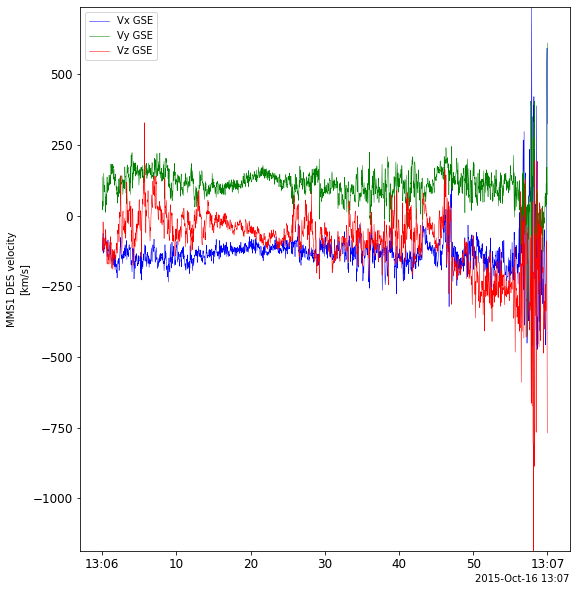

In [5]:
tplot('mms1_des_bulkv_gse_brst')

## Change the figure size

You can change the figure size with the 'xsize' and 'ysize' keywords (specified in inches)

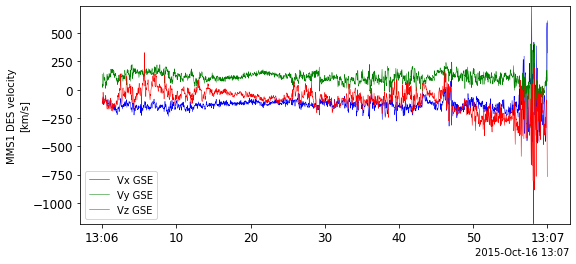

In [6]:
tplot('mms1_des_bulkv_gse_brst', xsize=8, ysize=4)

## Add an additional x-axis

You can add an additional x-axis using the 'var_label' keyword

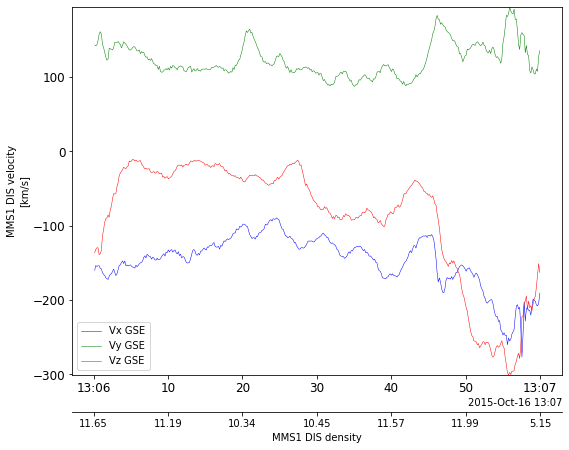

In [7]:
tplot('mms1_dis_bulkv_gse_brst', var_label='mms1_dis_numberdensity_brst', xsize=8, ysize=7)

## Plot multiple variables at once

Create a figure with line plots and spectra

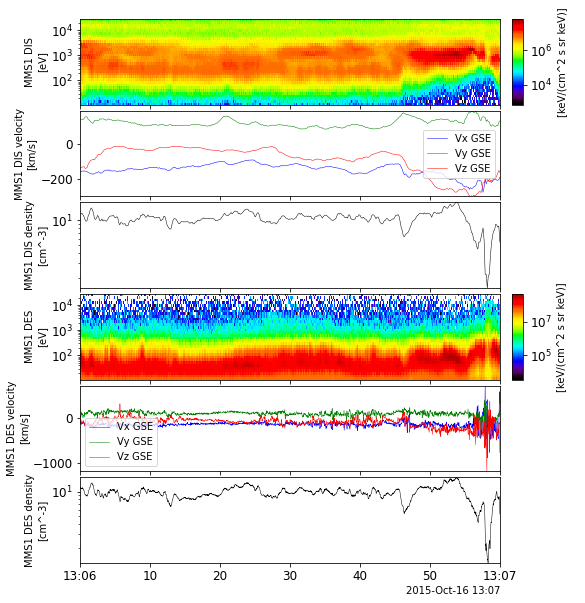

In [8]:
tplot(['mms1_dis_energyspectr_omni_brst',
       'mms1_dis_bulkv_gse_brst',
       'mms1_dis_numberdensity_brst',
       'mms1_des_energyspectr_omni_brst',
       'mms1_des_bulkv_gse_brst',
       'mms1_des_numberdensity_brst'])

## Update plot metadata

Add the units to the ysubtitle of the DES and DIS energy spectra

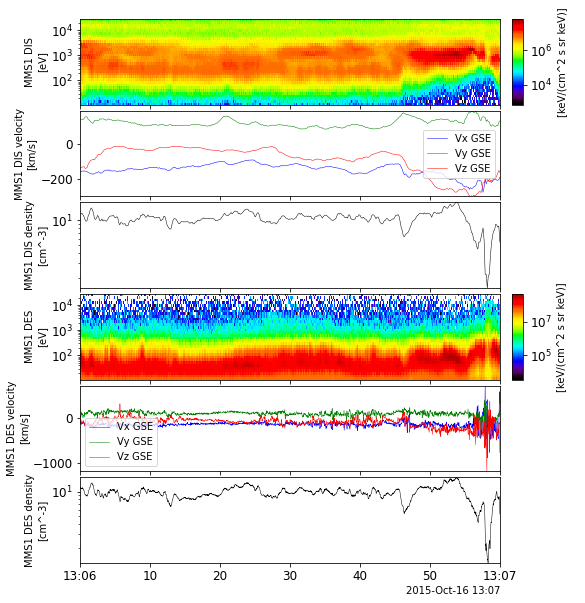

In [9]:
from pytplot import options

options('mms1_dis_energyspectr_omni_brst', 'ysubtitle', '[eV]')
options('mms1_des_energyspectr_omni_brst', 'ysubtitle', '[eV]')

tplot(['mms1_dis_energyspectr_omni_brst',
       'mms1_dis_bulkv_gse_brst',
       'mms1_dis_numberdensity_brst',
       'mms1_des_energyspectr_omni_brst',
       'mms1_des_bulkv_gse_brst',
       'mms1_des_numberdensity_brst'])

Change the DES and DIS densities to a log axis

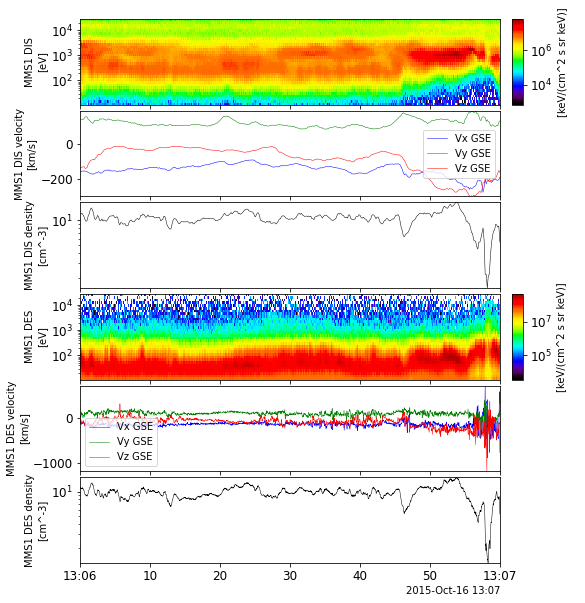

In [10]:
options('mms1_dis_numberdensity_brst', 'ylog', True)
options('mms1_des_numberdensity_brst', 'ylog', True)

tplot(['mms1_dis_energyspectr_omni_brst',
       'mms1_dis_bulkv_gse_brst',
       'mms1_dis_numberdensity_brst',
       'mms1_des_energyspectr_omni_brst',
       'mms1_des_bulkv_gse_brst',
       'mms1_des_numberdensity_brst'])

## Set figure title

'MMS1' is repeated in every ytitle; we can move it to the top of the figure with tplot_options

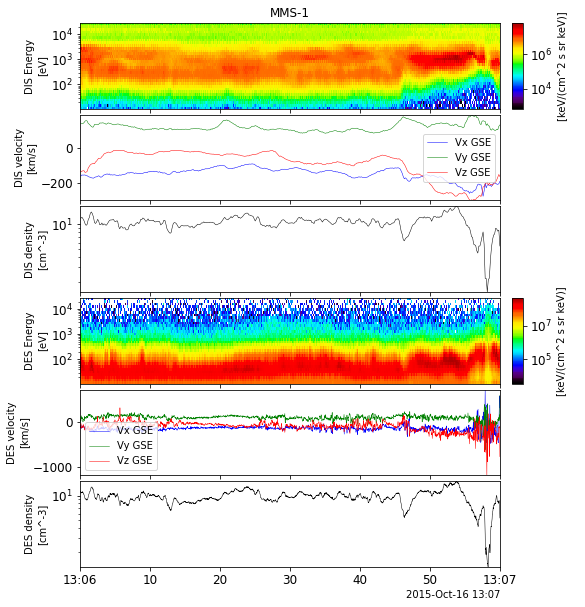

In [11]:
from pytplot import tplot_options

tplot_options('title', 'MMS-1')

options('mms1_dis_energyspectr_omni_brst', 'ytitle', 'DIS Energy')
options('mms1_dis_bulkv_gse_brst', 'ytitle', 'DIS velocity')
options('mms1_dis_numberdensity_brst', 'ytitle', 'DIS density')
options('mms1_des_energyspectr_omni_brst', 'ytitle', 'DES Energy')
options('mms1_des_bulkv_gse_brst', 'ytitle', 'DES velocity')
options('mms1_des_numberdensity_brst', 'ytitle', 'DES density')

tplot(['mms1_dis_energyspectr_omni_brst',
       'mms1_dis_bulkv_gse_brst',
       'mms1_dis_numberdensity_brst',
       'mms1_des_energyspectr_omni_brst',
       'mms1_des_bulkv_gse_brst',
       'mms1_des_numberdensity_brst'])

## Change the range of the y-axis

You can change the range of the y-axis with the 'yrange' option

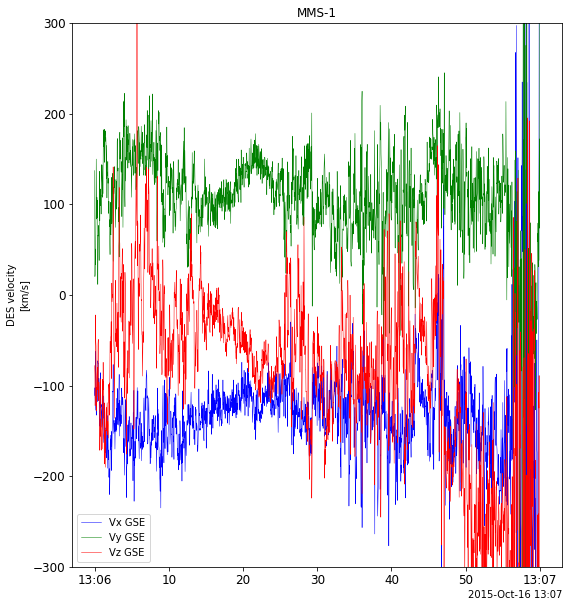

In [12]:
options('mms1_des_bulkv_gse_brst', 'yrange', [-300, 300])

tplot('mms1_des_bulkv_gse_brst')

## Change the range of the z-axis

You can change the range of the color bar using the 'zrange' option

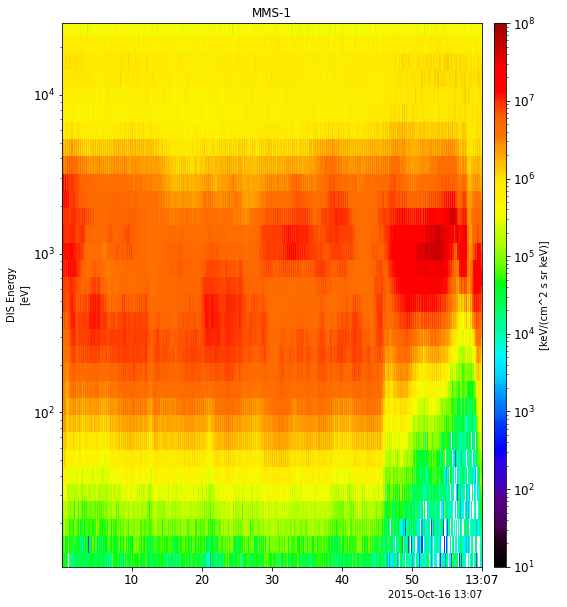

In [13]:
options('mms1_dis_energyspectr_omni_brst', 'zrange', [10, 1e8])

tplot('mms1_dis_energyspectr_omni_brst')

## Overplot lines on spectra

You can plot lines on top of spectra by combining the variables using store_data

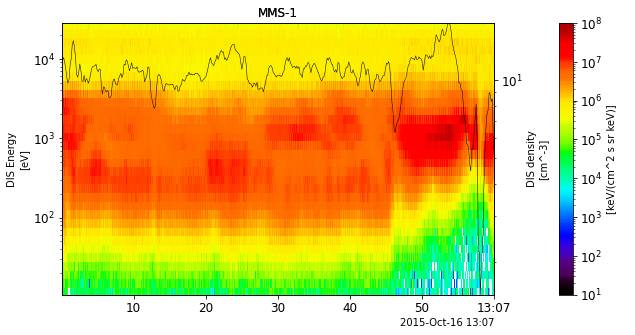

In [14]:
from pytplot import store_data

store_data('dis_enspec_density', data='mms1_dis_energyspectr_omni_brst mms1_dis_numberdensity_brst')

options('dis_enspec_density', 'right_axis', True)
tplot_options('xmargin', [0.2, 0.2])

tplot('dis_enspec_density', xsize=10, ysize=5)

Changing the y-axis range works just like it would if we weren't overplotting

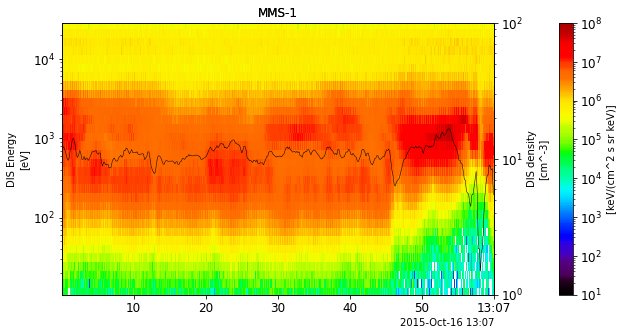

In [15]:
options('mms1_dis_numberdensity_brst', 'yrange', [1, 100])

tplot('dis_enspec_density', xsize=10, ysize=5)

## Change the color bar

You can change the color bar with the 'Colormap' option

see: https://matplotlib.org/stable/gallery/color/colormap_reference

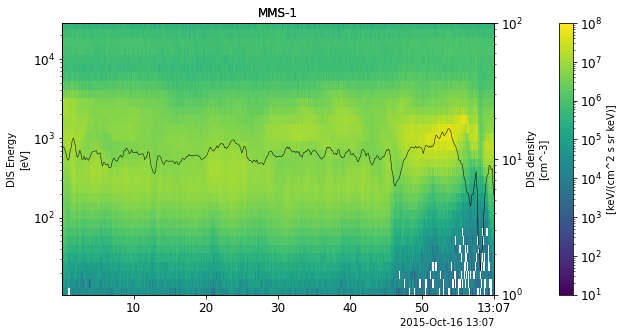

In [16]:
options('mms1_dis_energyspectr_omni_brst', 'Colormap', 'viridis')

tplot('dis_enspec_density', xsize=10, ysize=5)

## Change line options

You can change the line color with the 'color' option

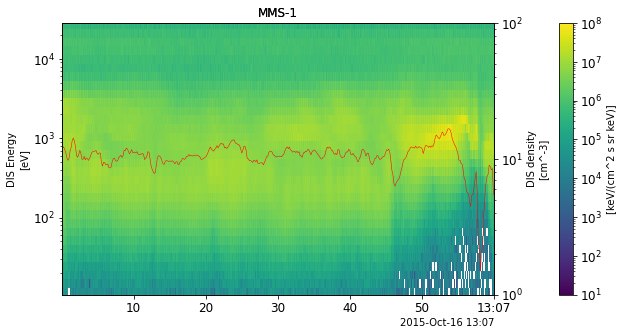

In [17]:
options('mms1_dis_numberdensity_brst', 'color', 'r')

tplot('dis_enspec_density', xsize=10, ysize=5)

You can change the line thickness with the 'thick' option

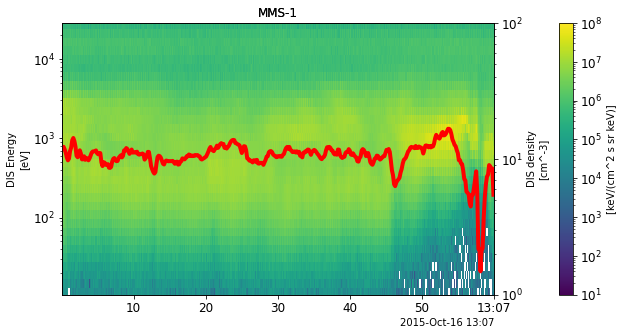

In [18]:
options('mms1_dis_numberdensity_brst', 'thick', 4)
tplot('dis_enspec_density', xsize=10, ysize=5)

You can change the line style with the 'line_style' option

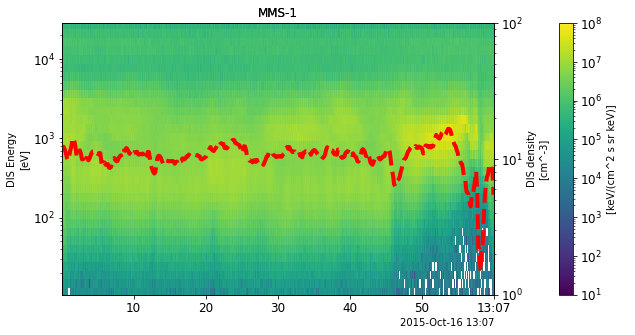

In [19]:
options('mms1_dis_numberdensity_brst', 'line_style', 'dashed')
tplot('dis_enspec_density', xsize=10, ysize=5)

## Add vertical bars to the figure

You can add vertical bars using the 'timebar' option

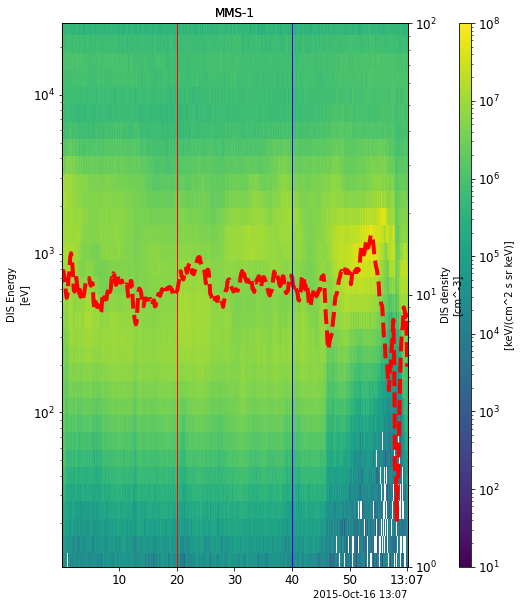

In [20]:
from pytplot import timebar

timebar('2015-10-16 13:06:20', color='r')
timebar('2015-10-16 13:06:40', color='b')

tplot('dis_enspec_density')

## Zoom into a time range

You can zoom into a time range using tlimit

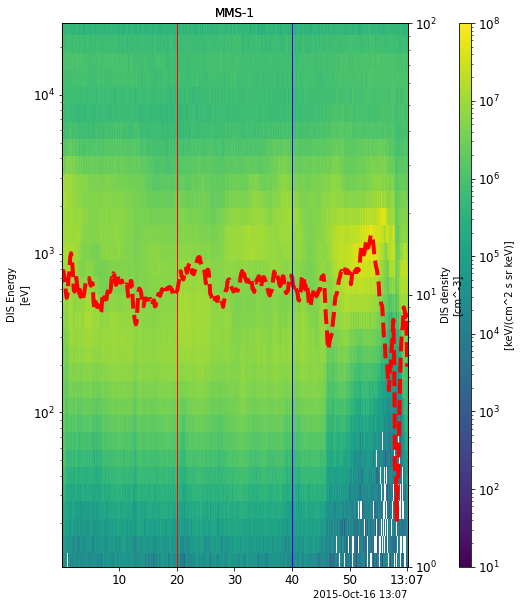

In [21]:
from pytplot import tlimit

#tlimit(['2015-10-16 13:06:20', '2015-10-16 13:06:40'])
tplot('dis_enspec_density')

## Spectra interpolation options

You can turn on interpolation with the 'x_interp' and 'y_interp' options

09-Feb-22 21:09:56: Loading pydata/mms1/epd-eis/srvy/l2/extof/2015/10/mms1_epd-eis_srvy_l2_extof_20151016_v3.0.100.cdf
09-Feb-22 21:10:19: Problem calculating the spin-average for species: alpha (extof)
09-Feb-22 21:10:19: Error, problem finding the telescopes to calculate omni-directional spectrograms
09-Feb-22 21:10:19: Error, problem finding the telescopes to calculate omni-directional spectrograms


That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
Time_Minus
Time_Plus
mms1_epd_eis_srvy_l2_extof_duration
mms1_epd_eis_srvy_l2_extof_deadtime
mms1_epd_eis_srvy_l2_extof_largepixel
mms1_epd_eis_srvy_l2_extof_starttai
mms1_epd_eis_srvy_l2_extof_midtai
mms1_epd_eis_srvy_l2_extof_endtai
mms1_epd_eis_srvy_l2_extof_spin
mms1_epd_eis_srvy_l2_extof_sector
mms1_epd_eis_srvy_l2_extof_quality
mms1_epd_eis_srvy_l2_extof_proton_P3_counts_t0
mms1_epd_eis_srvy_l2_extof_proton_P3_counts_t1
mms1_epd_eis_srvy_l2_extof_proton_P3_counts_t2
mms1_epd_eis_srvy_l2_extof_proton_P3_counts_t3
mms1_epd_eis_srvy_l2_extof_proton_P3_counts_t4
mms1_epd_eis_srvy_l2_extof_proton_P3_counts_t5
mms1_epd_eis_srv

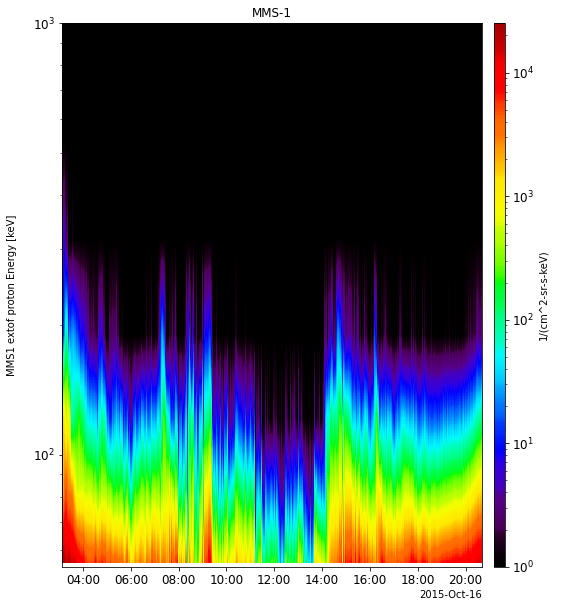

In [22]:
pyspedas.mms.eis(trange=['2015-10-16', '2015-10-17'], datatype='extof')

#tlimit(['2015-10-16 00:00:00', '2015-10-17 00:00:00'])
tplot('mms1_epd_eis_srvy_l2_extof_proton_flux_omni_spin')

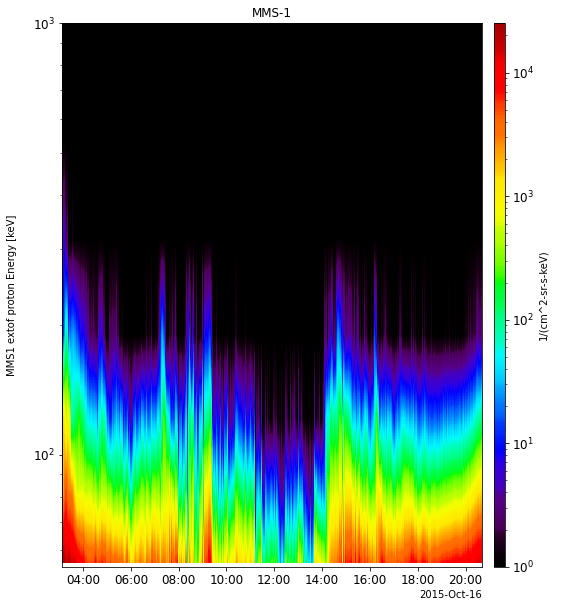

In [23]:
options('mms1_epd_eis_srvy_l2_extof_proton_flux_omni_spin', 'x_interp', True)
options('mms1_epd_eis_srvy_l2_extof_proton_flux_omni_spin', 'y_interp', True)

tplot('mms1_epd_eis_srvy_l2_extof_proton_flux_omni_spin')

## Add error bars

You can add error bars to a line by specifying the 'dy' field in store_data

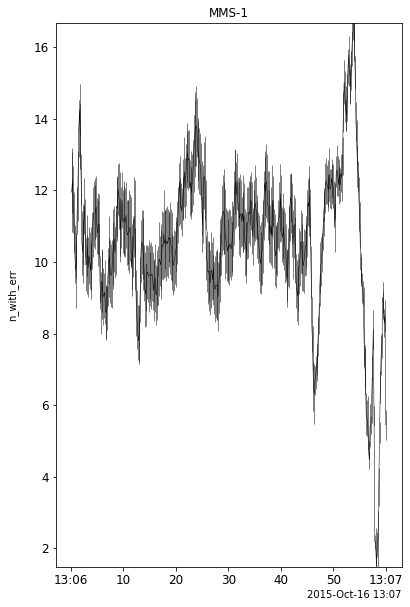

In [24]:
from pytplot import get_data, store_data

n_data = get_data('mms1_dis_numberdensity_brst')
err_data = get_data('mms1_dis_numberdensity_err_brst')

# note multiplying the error data by 5 to make sure they're visible
store_data('n_with_err', data={'x': n_data.times, 'y': n_data.y, 'dy': err_data.y*5})
tplot('n_with_err')

## Add text to figures

You can add text to figures by returning the plot objects and manipulating them directly

Text(16724.546122685184, 8, 'Your text')

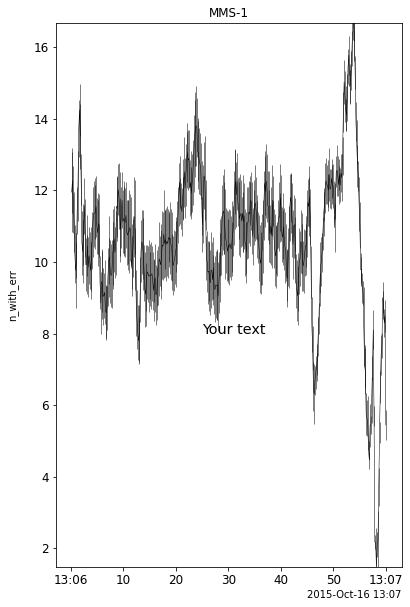

In [25]:
from datetime import datetime, timezone
import matplotlib
fig, axes = tplot('n_with_err', return_plot_objects=True)

time = matplotlib.dates.date2num(datetime(2015, 10, 16, 13, 6, 25, tzinfo=timezone.utc))
axes.annotate('Your text', (time, 8), fontsize='x-large')

You can also specify the location of the text in normal coordinates

Text(0.5, 0.5, 'Your text')

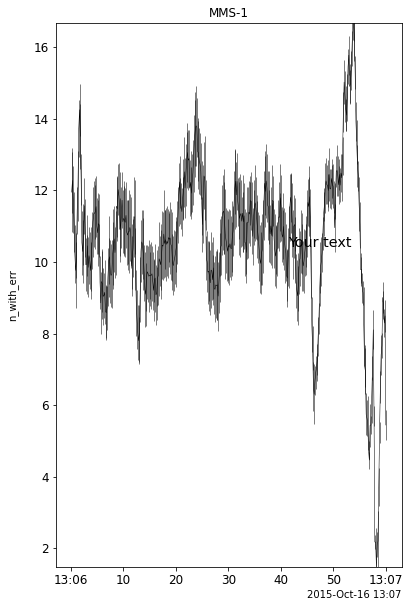

In [26]:
fig, axes = tplot('n_with_err', return_plot_objects=True)

axes.annotate('Your text', (0.5, 0.5), xycoords='figure fraction', fontsize='x-large')

## Save the figure

You can save the figure using several keywords

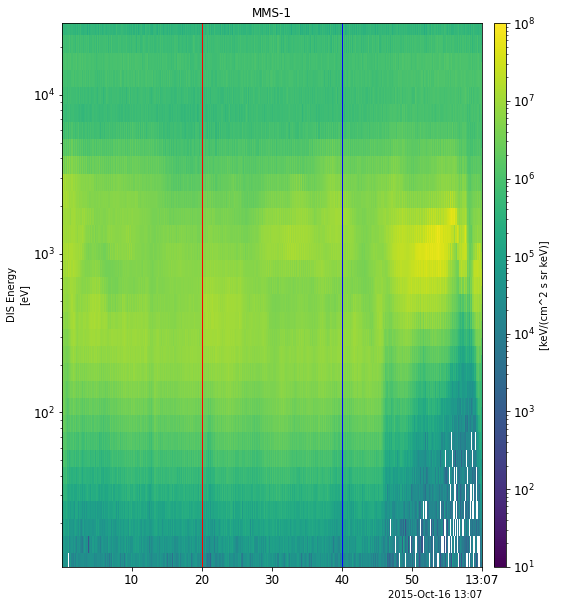

09-Feb-22 21:10:25: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


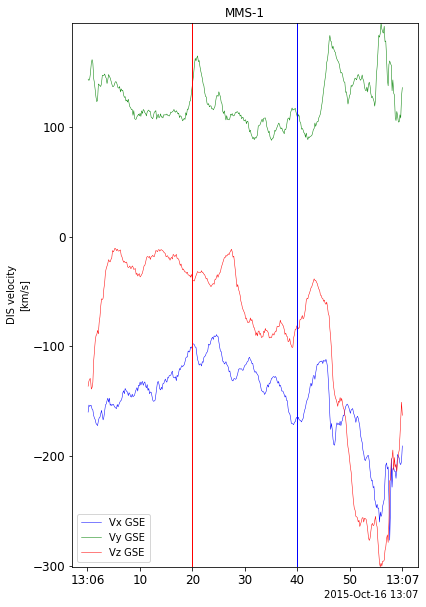

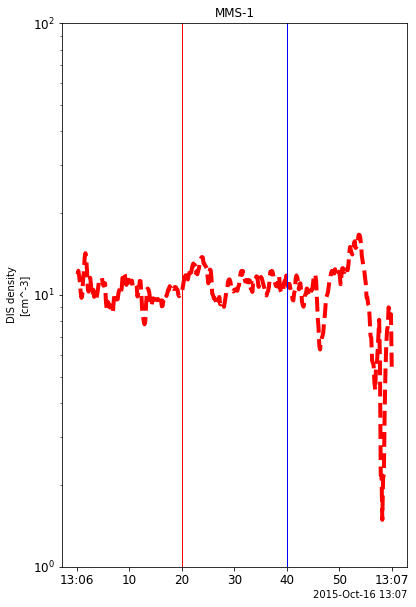

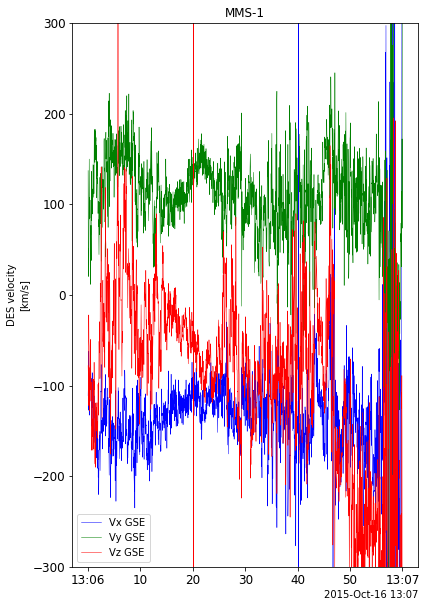

In [27]:
# PNG
tplot('mms1_dis_energyspectr_omni_brst', save_png='mms1')

# Postscript
tplot('mms1_dis_bulkv_gse_brst', save_eps='mms1')

# SVG
tplot('mms1_dis_numberdensity_brst', save_svg='mms1')

# PDF
tplot('mms1_des_bulkv_gse_brst', save_pdf='mms1')